# Visualizing Inflation for 2019 using Pandas-datareader and GeoPandas

Sources: [World Bank Data](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG),
         [GeoPandas](https://geopandas.org/en/stable/docs/user_guide/world_mapping.html)




**1. Retrieving inflation data from World Bank using Pandas-datareader**

In [255]:
import pandas as pd
from pandas_datareader import wb

inflation_consumer_prices = 'FP.CPI.TOTL.ZG'


inflation = wb.download(indicator = inflation_consumer_prices, country = 'all', start= 2019, end= 2019)
inflation


,,FP.CPI.TOTL.ZG
country,year,
Africa Eastern and Southern,2019,3.923372
Africa Western and Central,2019,1.758565
Arab World,2019,1.091848
Caribbean small states,2019,1.431356
Central Europe and the Baltics,2019,2.664561
...,...,...
Virgin Islands (U.S.),2019,NaN
West Bank and Gaza,2019,1.580183
"Yemen, Rep.",2019,NaN


In [256]:
inflation = inflation.reset_index(level=('country','year'))
inflation


,country,year,FP.CPI.TOTL.ZG
0,Africa Eastern and Southern,2019,3.923372
1,Africa Western and Central,2019,1.758565
2,Arab World,2019,1.091848
3,Caribbean small states,2019,1.431356
4,Central Europe and the Baltics,2019,2.664561
...,...,...,...
261,Virgin Islands (U.S.),2019,NaN
262,West Bank and Gaza,2019,1.580183
263,"Yemen, Rep.",2019,NaN
264,Zambia,2019,9.150316


In [257]:
inflation = inflation.rename(columns={'FP.CPI.TOTL.ZG': 'inflation'})
inflation


,country,year,inflation
0,Africa Eastern and Southern,2019,3.923372
1,Africa Western and Central,2019,1.758565
2,Arab World,2019,1.091848
3,Caribbean small states,2019,1.431356
4,Central Europe and the Baltics,2019,2.664561
...,...,...,...
261,Virgin Islands (U.S.),2019,NaN
262,West Bank and Gaza,2019,1.580183
263,"Yemen, Rep.",2019,NaN
264,Zambia,2019,9.150316


**2. Retrieving world world_map data from Geopandas**

In [258]:
import geopandas

world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world_map


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

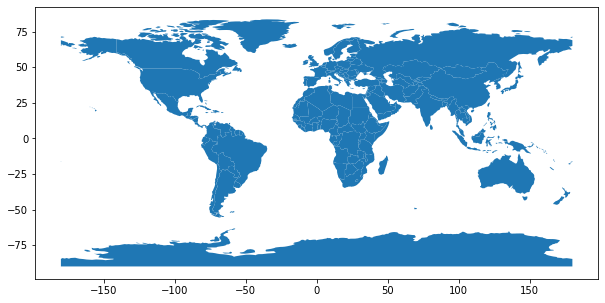

In [259]:
world_map.plot(figsize=(14,5))

**3. Excluding Antarctica for visual purposes**

In [260]:
Antarctica = world_map[world_map['name']=='Antarctica']
Antarctica

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
159,4050,Antarctica,Antarctica,ATA,810.0,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140..."


In [261]:
world_map = world_map[world_map['name']!= 'Antarctica']
world_map

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

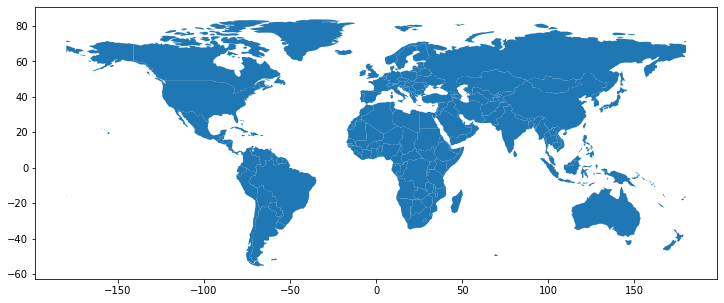

In [233]:
world_map.plot(figsize=(14,5))

**4. Joining the inflation and the world world_map datasets**

In [262]:
world_map_inflation = world_map.merge(inflation,left_on='name', right_on='country', how='outer')
world_map_inflation




,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,year,inflation
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2019,1.773102
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2019,3.464281
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2019,1.949269
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,None,United States,2019,1.812210
296,NaN,NaN,NaN,NaN,NaN,None,"Venezuela, RB",2019,NaN
297,NaN,NaN,NaN,NaN,NaN,None,Virgin Islands (U.S.),2019,NaN
298,NaN,NaN,NaN,NaN,NaN,None,West Bank and Gaza,2019,1.580183


Joining the tables like this is not very effective because some country names are 
not exactly the same across the two dataframes (United States of America vs United States, Russia vs Russian Federation etc.). We will solve this by finding all the country names that do not match exactly (like Russia and Russian Federation) and remap them to one single value (Russia). This will make sure that there is uniformity between the two dataframes. In order to this, we will use a package called fuzzywuzzy which uses the Levehnstein distance to calculate the distance between strings. 

In [263]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz


def fuzzy_remap(df_1, df_2, key1, key2, threshold=90, limit=1):
    
    for country in df_1[key1]:
        matches = process.extract(country,df_2[key2], limit=limit)
        
        for potential_matches in matches:
            if potential_matches[1] >= threshold:
                
                df_2.loc[df_2[key2]==potential_matches[0],key2]= country
                 
    return df_2


inflation = fuzzy_remap(world_map, inflation, 'name', 'country')

inflation



    

    

,country,year,inflation
0,Africa Eastern and Southern,2019,3.923372
1,Africa Western and Central,2019,1.758565
2,Arab World,2019,1.091848
3,Caribbean small states,2019,1.431356
4,Central Europe and the Baltics,2019,2.664561
...,...,...,...
261,Virgin Islands (U.S.),2019,NaN
262,West Bank and Gaza,2019,1.580183
263,Yemen,2019,NaN
264,Zambia,2019,9.150316


After having defined the fuzzy_remap function and having called with the two dataframes (world_map and inflation) and the two country columns as arguments, now the country names between the two dataframes should match. Let's double check this by verifying that both dataframes contain the country name United States of America (instead of United States).

In [264]:
inflation[inflation['country']=='United States of America']

,country,year,inflation
255,United States of America,2019,1.81221


In [266]:
world_map[world_map['name']== 'United States of America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Now that we are sure that the remapping worked correctly, we can go ahed and join the two dataframes.

In [267]:
world_map_inflation= world_map.merge(inflation,left_on='name', right_on='country', how='outer')
world_map_inflation

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,year,inflation
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2019,1.773102
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2019,3.464281
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2019,1.949269
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,2019,1.812210
...,...,...,...,...,...,...,...,...,...
279,NaN,NaN,NaN,NaN,NaN,None,Tonga,2019,NaN
280,NaN,NaN,NaN,NaN,NaN,None,Turks and Caicos Islands,2019,NaN
281,NaN,NaN,NaN,NaN,NaN,None,Tuvalu,2019,NaN
282,NaN,NaN,NaN,NaN,NaN,None,Virgin Islands (U.S.),2019,NaN


Since the two columns have different names, it is better to rename one of them before joining the dataframes.

In [243]:
world_map= world_map.rename(columns={'name':'country'})
world_map

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [245]:
world_map_inflation= world_map.merge(inflation,on='country', how='outer')
world_map_inflation

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,year,inflation
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2019,1.773102
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2019,3.464281
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2019,1.949269
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2019,1.812210
...,...,...,...,...,...,...,...,...
279,NaN,NaN,Tonga,NaN,NaN,None,2019,NaN
280,NaN,NaN,Turks and Caicos Islands,NaN,NaN,None,2019,NaN
281,NaN,NaN,Tuvalu,NaN,NaN,None,2019,NaN
282,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,None,2019,NaN


**5. Plotting the results**

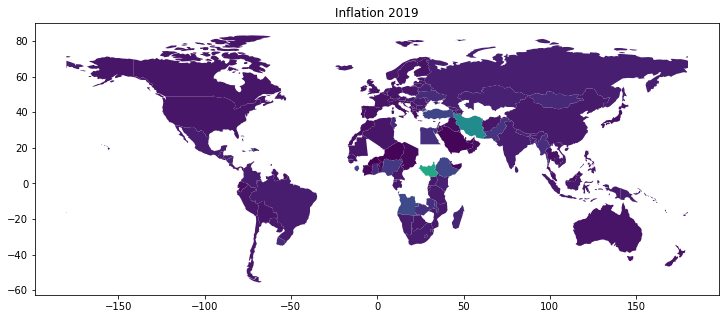

In [250]:
import matplotlib.pyplot as plt

world_map_inflation.plot('inflation',figsize=(14,5))
plt.title("Inflation 2019")
plt.show()

Adding a color and a color mapping with the cmap and scheme options found in the Geopandas documentation.

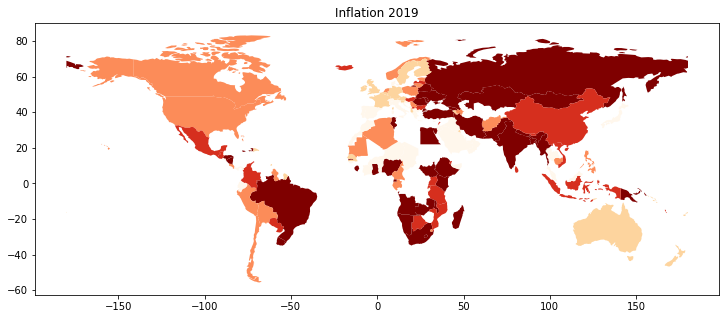

In [251]:
world_map_inflation.plot('inflation', figsize=(14,5),cmap='OrRd', scheme='quantiles')
plt.title("Inflation 2019")
plt.show()

Adding a legend and the color lightgrey for missing values.

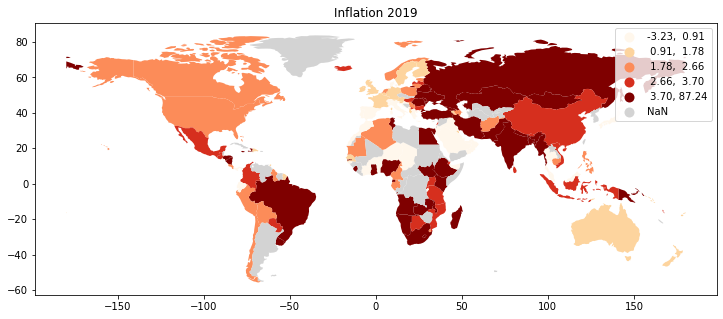

In [253]:
world_map_inflation.plot('inflation', cmap='OrRd', scheme='quantiles', missing_kwds={"color": "lightgrey"}, legend=True, figsize=(14,5))
plt.title("Inflation 2019")
plt.show()